In [12]:
# 필요한 module import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.preprocessing import MinMaxScaler


# Data Loading
mnist = pd.read_csv("./data/digit-recognizer/train.csv")


train_num = int(mnist.shape[0] * 0.8)   
test_num = mnist.shape[0] - train_num

train_data=mnist[:train_num]
test_data=mnist[train_num:]

# train, test data set
train_x_data = mnist.drop("label",axis=1, inplace=False)[:train_num].values
test_x_data = mnist.drop("label",axis=1, inplace=False)[train_num:].values

train_y_data = mnist['label'][:train_num].values
test_y_data = mnist['label'][train_num:].values

# 값이 너무 크니 minmax scale 
scaler= MinMaxScaler()
train_x_data = scaler.fit_transform(train_x_data)
test_x_data = scaler.fit_transform(test_x_data)

# 더미변수로 바꿔주기
train_y_data = pd.get_dummies(train_y_data) 
test_y_data = pd.get_dummies(test_y_data) 

In [13]:
train_y_data

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
33595,0,0,0,0,0,0,1,0,0,0
33596,1,0,0,0,0,0,0,0,0,0
33597,1,0,0,0,0,0,0,0,0,0
33598,0,0,1,0,0,0,0,0,0,0


In [14]:
# tensorflow로 machine learning
# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
# 학습
train_epoch = 300
batch_size = 100

# 모든 데이터 불러오지 않고, 몇개씩 불러들어서 학습

for step in range(train_epoch):
    num_of_iter = int(train_num / batch_size)     # train이 도대체 몇개 행이 있는지 / batch_size
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x=train_x_data[i*100:(i+1)*100]
        batch_y=train_y_data[i*100:(i+1)*100]
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y})
    if step % 30 ==0:
        print("Cost값은: {}".format(cost_val))
# cost값이 기준이 되니 중요해

# 학습이 종료되었으니 정확도를 측정해야 해요
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도는 : {}".format(sess.run(accuracy, 
                                  feed_dict={X:test_x_data,
                                             Y:test_y_data})))
# 얼마나 학습이 잘 되었는가


Cost값은: 1.681679368019104
Cost값은: 0.6623614430427551
Cost값은: 0.6246580481529236
Cost값은: 0.591850996017456
Cost값은: 0.564678966999054
Cost값은: 0.540935754776001
Cost값은: 0.5204043388366699
Cost값은: 0.5027886033058167
Cost값은: 0.4877146780490875
Cost값은: 0.474796324968338
정확도는 : 0.9182142615318298


Label : [4]
Predict :[4]


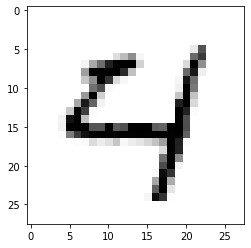

In [16]:
# Prediction
# 랜덤으로 하나의 데이터를 추출해서 그놈을 이용해서 prediction을 한 후 결과를 비교해 보자

r = np.random.randint(0,test_num) # mnist.test.num_examples = 10000

print("Label : {}".format(sess.run(tf.argmax(test_y_data[r:r+1], axis=1))))

print("Predict :{}".format(sess.run(tf.argmax(H,1), 
         feed_dict={X:test_x_data[r:r+1]})))    # 2차원

plt.imshow(test_x_data[r:r+1].reshape(28,28), cmap="Greys")
# 1,784 => 28,28로 바꿀거야

In [17]:
test_x_data[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
## 진짜 test 파일로 돌려보자!!

test_data = pd.read_csv("./data/digit-recognizer/test.csv")

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform(test_data)

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [19]:
my_df = pd.DataFrame()
my_df["ImageId"] = range(1,test_data.shape[0]+1)
my_df["Label"] = result
my_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [51]:
my_df.to_csv("mnist_submission.csv",index=False)

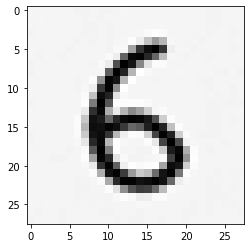

In [114]:
import PIL.Image as pilimg
import numpy as np
from PIL import Image

# Read image
img = Image.open("./data/digit-recognizer/6.jpg").convert('L')
resize_img = img.resize((28,28))
# Display image
# resize_img.show()
 
# Fetch image pixel data to numpy array
pix_g = np.array(resize_img)

plt.imshow(pix_g, cmap='gray')




# im = pilimg.open("./data/digit-recognizer/9.jpg")
# resize_im = im.resize((28,28))
# # Display image
# resize_im.show()
 
# # Fetch image pixel data to numpy array
# pix = np.array(resize_im)

# plt.imshow(pix, cmap='gray')

In [115]:
pix_g

array([[245, 245, 245, 245, 245, 245, 244, 244, 245, 244, 244, 245, 246,
        245, 245, 245, 245, 245, 246, 245, 245, 245, 245, 244, 244, 245,
        245, 245],
       [245, 246, 245, 245, 245, 245, 245, 244, 245, 244, 245, 245, 245,
        245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 244, 245,
        245, 245],
       [245, 245, 245, 245, 245, 245, 245, 244, 244, 245, 244, 245, 245,
        245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 244, 244, 245,
        245, 245],
       [244, 245, 245, 245, 245, 245, 245, 244, 244, 245, 244, 245, 245,
        245, 246, 250, 253, 250, 245, 245, 245, 245, 245, 244, 245, 245,
        244, 245],
       [245, 245, 245, 245, 245, 245, 244, 245, 244, 245, 244, 245, 246,
        252, 238, 199, 163, 188, 247, 245, 245, 245, 244, 245, 245, 245,
        245, 245],
       [245, 245, 245, 245, 245, 244, 245, 245, 245, 245, 244, 248, 247,
        171,  71,  34,  22,  71, 239, 246, 245, 244, 245, 245, 245, 245,
        244, 245],
       [24

In [116]:
pix_dd=255-pix_g

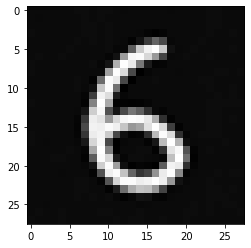

In [117]:
pix_dd
plt.imshow(pix_dd, cmap='gray')

In [118]:
pix_dd

array([[ 10,  10,  10,  10,  10,  10,  11,  11,  10,  11,  11,  10,   9,
         10,  10,  10,  10,  10,   9,  10,  10,  10,  10,  11,  11,  10,
         10,  10],
       [ 10,   9,  10,  10,  10,  10,  10,  11,  10,  11,  10,  10,  10,
         10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  11,  11,  10,
         10,  10],
       [ 10,  10,  10,  10,  10,  10,  10,  11,  11,  10,  11,  10,  10,
         10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  11,  11,  10,
         10,  10],
       [ 11,  10,  10,  10,  10,  10,  10,  11,  11,  10,  11,  10,  10,
         10,   9,   5,   2,   5,  10,  10,  10,  10,  10,  11,  10,  10,
         11,  10],
       [ 10,  10,  10,  10,  10,  10,  11,  10,  11,  10,  11,  10,   9,
          3,  17,  56,  92,  67,   8,  10,  10,  10,  11,  10,  10,  10,
         10,  10],
       [ 10,  10,  10,  10,  10,  11,  10,  10,  10,  10,  11,   7,   8,
         84, 184, 221, 233, 184,  16,   9,  10,  11,  10,  10,  10,  10,
         11,  10],
       [ 1

In [119]:
pix_dd=pix_dd.reshape([1,-1])
pix_dd

array([[ 10,  10,  10,  10,  10,  10,  11,  11,  10,  11,  11,  10,   9,
         10,  10,  10,  10,  10,   9,  10,  10,  10,  10,  11,  11,  10,
         10,  10,  10,   9,  10,  10,  10,  10,  10,  11,  10,  11,  10,
         10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  11,
         11,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  11,  11,
         10,  11,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,
         10,  11,  11,  10,  10,  10,  11,  10,  10,  10,  10,  10,  10,
         11,  11,  10,  11,  10,  10,  10,   9,   5,   2,   5,  10,  10,
         10,  10,  10,  11,  10,  10,  11,  10,  10,  10,  10,  10,  10,
         10,  11,  10,  11,  10,  11,  10,   9,   3,  17,  56,  92,  67,
          8,  10,  10,  10,  11,  10,  10,  10,  10,  10,  10,  10,  10,
         10,  10,  11,  10,  10,  10,  10,  11,   7,   8,  84, 184, 221,
        233, 184,  16,   9,  10,  11,  10,  10,  10,  10,  11,  10,  10,
         11,  10,  10,  11,  10,  10,  10,  10,  10

In [120]:
prediction_data = scaler.transform(pix_dd)
result = sess.run(tf.argmax(H,1), feed_dict={X:pix_dd})
result

array([6], dtype=int64)

Label : [4]
Predict :[6]


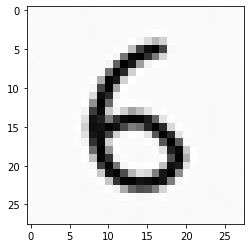

In [121]:
# Prediction
# 랜덤으로 하나의 데이터를 추출해서 그놈을 이용해서 prediction을 한 후 결과를 비교해 보자


result = sess.run(tf.argmax(H,1), feed_dict={X:pix_dd})[0]


print("Label : {}".format(sess.run(tf.argmax(test_y_data[r:r+1], axis=1))))

print("Predict :{}".format(sess.run(tf.argmax(H,1), 
         feed_dict={X:pix_dd})))    # 2차원

plt.imshow(pix_dd.reshape(28,28), cmap="Greys")
# 1,784 => 28,28로 바꿀거야

In [122]:
prediction_data = scaler.transform(pix_dd)
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})
result

array([4], dtype=int64)

In [126]:
min(pix_g[[pix_g>150]])

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


156

In [128]:
pix_c=pix_g-150

In [130]:
pix_c.replace(pix_[[pix_c<100]], 0)

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [129]:
pix_c[[pix_c<100]]

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [111]:
pix_data=pd.DataFrame(pix_g)
pix_data-170

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,23,22,22,21,21,19,18,18,19,17,...,13,14,13,12,12,11,11,11,10,9
1,21,21,21,21,20,19,18,18,17,17,...,12,12,13,12,11,11,10,9,8,7
2,23,23,23,23,22,23,22,20,20,19,...,16,15,15,15,14,13,13,12,12,11
3,22,22,21,21,20,20,20,18,18,19,...,16,15,15,14,13,13,12,12,12,11
4,17,18,18,17,17,17,17,16,16,16,...,13,12,11,10,10,10,9,8,7,6
5,13,13,14,14,14,14,14,14,12,13,...,10,9,8,7,6,5,4,4,3,2
6,9,10,10,9,11,11,11,11,9,9,...,7,6,5,4,3,2,0,255,255,255
7,5,6,7,7,8,8,8,8,7,7,...,4,4,3,1,1,255,255,253,254,253
8,4,5,7,6,7,8,8,7,6,7,...,3,3,2,0,255,0,255,255,254,252
9,4,4,5,6,7,8,8,7,7,11,...,4,3,2,0,0,255,255,0,255,253


In [ ]:
# Prediction
# 랜덤으로 하나의 데이터를 추출해서 그놈을 이용해서 prediction을 한 후 결과를 비교해 보자

r = np.random.randint(0,test_num) # mnist.test.num_examples = 10000

print("Label : {}".format(sess.run(tf.argmax(test_y_data[r:r+1], axis=1))))

print("Predict :{}".format(sess.run(tf.argmax(H,1), 
         feed_dict={X:test_x_data[r:r+1]})))    # 2차원

plt.imshow(test_x_data[r:r+1].reshape(28,28), cmap="Greys")
# 1,784 => 28,28로 바꿀거야

In [84]:
pix.shape

(28, 28, 3)

In [85]:
pix


array([[[193, 193, 191],
        [192, 192, 190],
        [192, 192, 190],
        ...,
        [181, 181, 179],
        [180, 180, 178],
        [179, 179, 177]],

       [[191, 191, 189],
        [191, 191, 189],
        [191, 191, 189],
        ...,
        [179, 179, 177],
        [178, 178, 176],
        [177, 177, 175]],

       [[193, 193, 191],
        [193, 193, 192],
        [193, 193, 193],
        ...,
        [182, 182, 180],
        [182, 182, 180],
        [181, 181, 179]],

       ...,

       [[171, 170, 168],
        [171, 170, 168],
        [171, 170, 168],
        ...,
        [165, 165, 163],
        [165, 165, 163],
        [165, 165, 163]],

       [[172, 171, 169],
        [172, 171, 169],
        [172, 170, 168],
        ...,
        [166, 166, 164],
        [165, 165, 163],
        [165, 165, 163]],

       [[171, 170, 168],
        [172, 171, 169],
        [172, 170, 168],
        ...,
        [165, 165, 163],
        [164, 164, 162],
        [164, 164, 162]]